### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

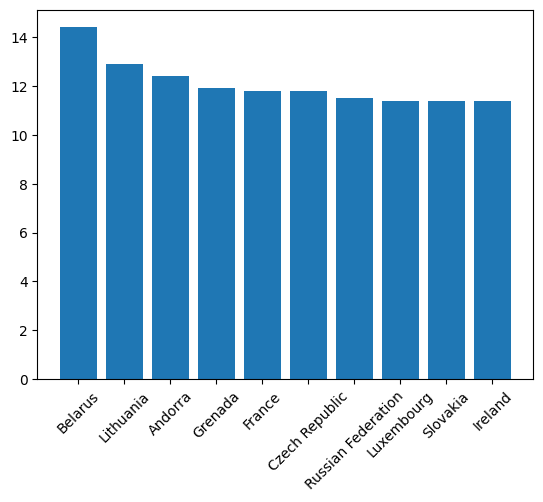

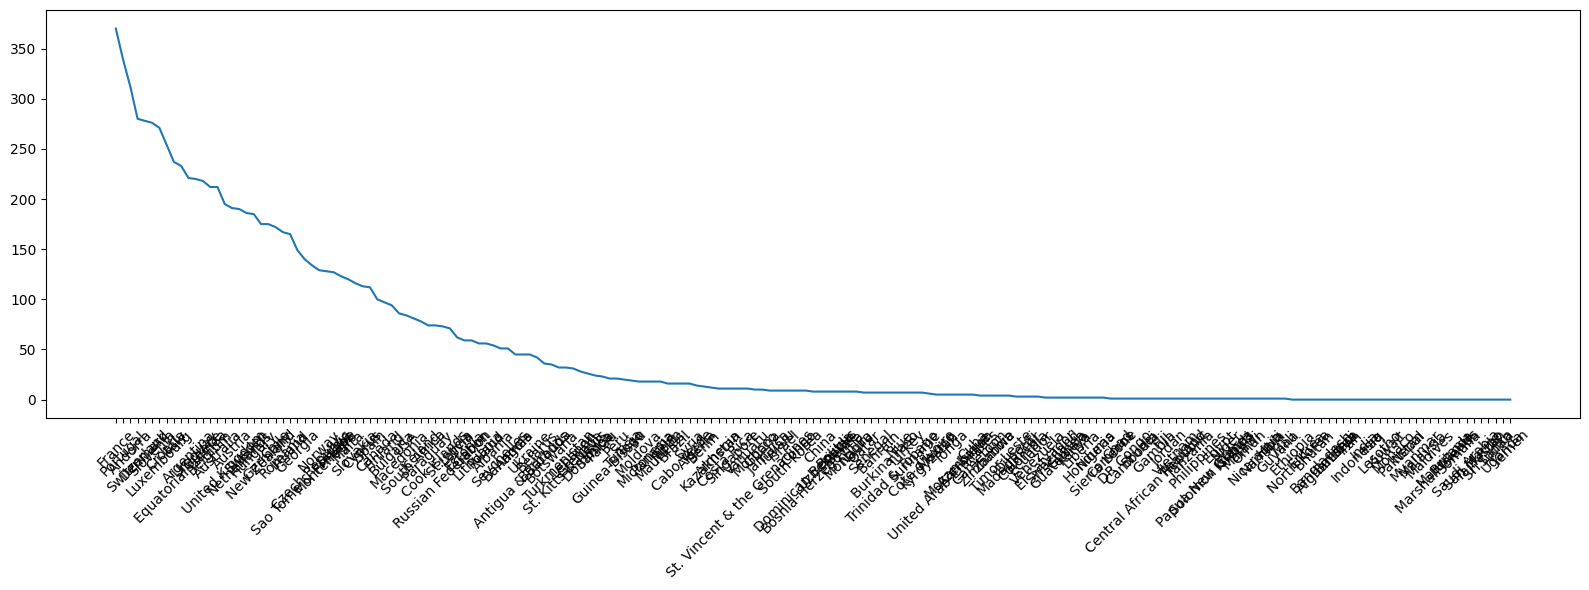

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
df.sort_values(by='total_litres_of_pure_alcohol', ascending=False).head(10)
media_birra = df.beer_servings.mean() #Media di beer_servings
media_vino = df.wine_servings.mean() #Media di wine_servings
media_distillati = df.spirit_servings.mean() #Media di spirit_servings
df['alcohol_index'] = (df['beer_servings'] + df['wine_servings'] + df['spirit_servings']) / 3
max_alcohol_index = df.loc[df['alcohol_index'].idxmax(), 'country']
piu_di_100_birre = df[df['beer_servings'] > 100]

paesi_alcohol = df.sort_values(by='total_litres_of_pure_alcohol', ascending=False).head(10)['country']
total_litres_of_pure_alcohol = df.sort_values(by='total_litres_of_pure_alcohol', ascending=False).head(10)['total_litres_of_pure_alcohol']
plt.xticks(rotation=45)
plt.bar(paesi_alcohol, total_litres_of_pure_alcohol)


paesi_vino = df.sort_values(by='wine_servings', ascending=False)['country']
wine_servings = df.sort_values(by='wine_servings', ascending=False)['wine_servings']
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
plt.plot(paesi_vino, wine_servings)
plt.tight_layout()
plt.show()


### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

Analisi per Paese:

                  job_country     avg_salary  job_count  min_salary  \
9                     Belarus  400000.000000          1    400000.0   
80                     Russia  292500.000000          4    250000.0   
7                     Bahamas  201511.619048         21    173500.0   
27         Dominican Republic  157500.000000          1    157500.0   
69   Northern Mariana Islands  155485.500000          1    155485.5   
..                        ...            ...        ...         ...   
37                   Honduras   63000.000000          1     63000.0   
8                  Bangladesh   60981.333333          3     16500.0   
60                 Montenegro   53014.000000          1     53014.0   
1                     Algeria   44550.000000          2     44100.0   
104                Uzbekistan   30750.000000          1     30750.0   

     max_salary  
9      400000.0  
80     320000.0  
7      284016.0  
27     157500.0  
69     155485.5  
..          ...  
3

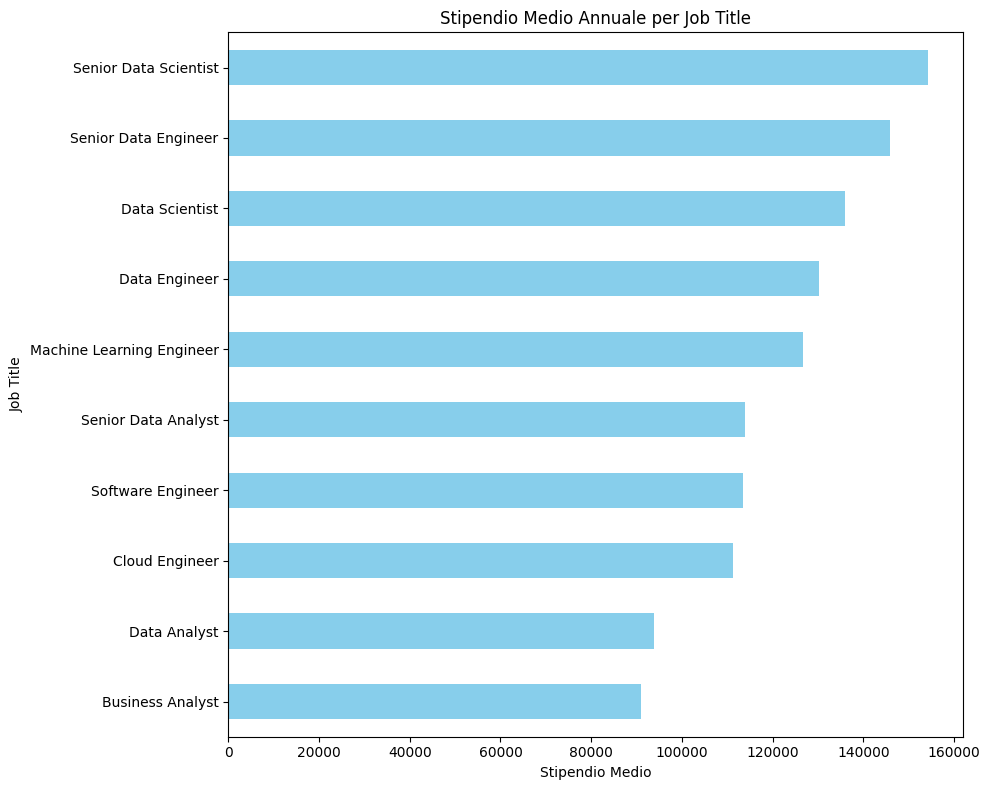

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

country_grouped = df.groupby('job_country').agg(
    avg_salary=('salary_year_avg', 'mean'),
    job_count=('salary_year_avg', 'count'),
    min_salary=('salary_year_avg', 'min'),
    max_salary=('salary_year_avg', 'max')
).reset_index()
country_grouped = country_grouped.sort_values(by='avg_salary', ascending=False)

print("Analisi per Paese:\n")
print(country_grouped)

job_title_salary = df.groupby('job_title_short')['salary_year_avg'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 8))
job_title_salary.plot(kind='barh', color='skyblue')
plt.title('Stipendio Medio Annuale per Job Title')
plt.xlabel('Stipendio Medio')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()